In [1]:
### Homogeneidad de dos grupos

In [2]:
import pandas as pd
import numpy as np
import os

In [4]:
os.listdir("./Datos/")

['drugstudy.csv',
 'employeeratings.csv',
 'forceps.csv',
 'homogeneidad2grupos.csv',
 'homogeneidad3grupos.csv',
 'pinetree.csv',
 'revenuedata.csv',
 'wine.csv']

In [5]:
df=pd.read_csv("./Datos/homogeneidad2grupos.csv")

In [6]:
df.head()

,salary,position
0,57727.0,2.0
1,39907.0,1.0
2,46659.0,2.0
3,40233.0,1.0
4,42198.0,1.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   salary    20 non-null     float64
 1   position  20 non-null     float64
dtypes: float64(2)
memory usage: 448.0 bytes


In [8]:
grupo1=df[df.position==1.0]
grupo2=df[df.position==2.0]

In [9]:
grupo1.shape

(10, 2)

In [10]:
grupo2.shape

(10, 2)

In [13]:
from scipy.stats import levene

In [12]:
levene?

Signature: levene(*args, center='median', proportiontocut=0.05)
Docstring:
Perform Levene test for equal variances.

The Levene test tests the null hypothesis that all input samples
are from populations with equal variances.  Levene's test is an
alternative to Bartlett's test `bartlett` in the case where
there are significant deviations from normality.

Parameters
----------
sample1, sample2, ... : array_like
    The sample data, possibly with different lengths. Only one-dimensional
    samples are accepted.
center : {'mean', 'median', 'trimmed'}, optional
    Which function of the data to use in the test.  The default
    is 'median'.
proportiontocut : float, optional
    When `center` is 'trimmed', this gives the proportion of data points
    to cut from each end. (See `scipy.stats.trim_mean`.)
    Default is 0.05.

Returns
-------
statistic : float
    The test statistic.
pvalue : float
    The p-value for the test.

Notes
-----
Three variations of Levene's test are possible.  The p

$$H_0 : \sigma_1 = \sigma_2$$
$$H_1: \sigma_1 \neq \sigma_2$$

In [15]:
levene(grupo1.salary,grupo2.salary)

LeveneResult(statistic=11.318235429256069, pvalue=0.0034542567782278265)

In [16]:
levene(grupo1.salary,grupo2.salary,center="mean")

LeveneResult(statistic=11.402085842910381, pvalue=0.0033604796159699404)

## Ejercicios 
del fichero homogenidasd3grupo estudiar si tienen la misma varainza los tres o dos a dos.
**Estudiad si tienen la misma media**

## MANN WHITNEY o Prueba U
### Para detectar si dos grupos son independientes
Por cada grupo necesitaremos más de 20 muestra

In [17]:
os.listdir("./Datos")

['drugstudy.csv',
 'employeeratings.csv',
 'forceps.csv',
 'homogeneidad2grupos.csv',
 'homogeneidad3grupos.csv',
 'pinetree.csv',
 'revenuedata.csv',
 'wine.csv']

In [18]:
df=pd.read_csv('./Datos/forceps.csv')

In [19]:
df

,Forceps,Resection
0,2.0,2.0
1,1.0,2.0
2,2.0,3.0
3,1.0,1.0
4,1.0,2.0
5,1.0,3.0
6,2.0,3.0
7,2.0,3.0
8,1.0,2.0
9,1.0,1.0


* Estadar son los Forceps=1
* Jumbo son los Forceps=2
¿diferencias significativas?

In [21]:
from scipy.stats import mannwhitneyu

In [22]:
grupo1=df[df.Forceps==1.0]
grupo2=df[df.Forceps==2.0]

In [24]:
mannwhitneyu?

Signature:
mannwhitneyu(
    x,
    y,
    use_continuity=True,
    alternative='two-sided',
    axis=0,
    method='auto',
)
Docstring:
Perform the Mann-Whitney U rank test on two independent samples.

The Mann-Whitney U test is a nonparametric test of the null hypothesis
that the distribution underlying sample `x` is the same as the
distribution underlying sample `y`. It is often used as a test of
of difference in location between distributions.

Parameters
----------
x, y : array-like
    N-d arrays of samples. The arrays must be broadcastable except along
    the dimension given by `axis`.
use_continuity : bool, optional
        Whether a continuity correction (1/2) should be applied.
        Default is True when `method` is ``'asymptotic'``; has no effect
        otherwise.
alternative : {'two-sided', 'less', 'greater'}, optional
    Defines the alternative hypothesis. Default is 'two-sided'.
    Let *F(u)* and *G(u)* be the cumulative distribution functions of the
    distributio

In [25]:
mannwhitneyu(grupo1.Resection,grupo2.Resection)

MannwhitneyuResult(statistic=25.0, pvalue=0.031078184058262962)

In [26]:
grupo1.Resection.unique()

array([2., 1., 3.])

$$ H_0: \mu_1 \geq \mu_2$$ 
$$ H_1: \mu_1 < \mu_2$$

In [27]:
mannwhitneyu(grupo1.Resection,grupo2.Resection,alternative="less")

MannwhitneyuResult(statistic=25.0, pvalue=0.015539092029131481)

Utilizad el fichero de salarios para ver que grupo tiene mayor sueldo

In [28]:
### Como detectar si sigue una distribución normal
## Manera gráfica
import statsmodels.api as sm

In [29]:
df.head(1)

,Forceps,Resection
0,2.0,2.0


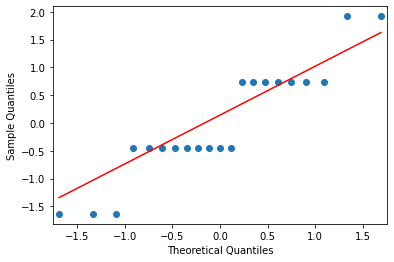

In [31]:
sm.qqplot(df["Resection"],fit=True,line='q');

In [32]:
salarios=pd.read_csv("./Datos/homogeneidad2grupos.csv")

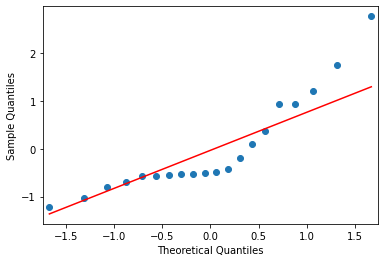

In [33]:
sm.qqplot(salarios["salary"],fit=True,line='q');

In [34]:
salarios=pd.read_csv("./Datos/homogeneidad3grupos.csv")

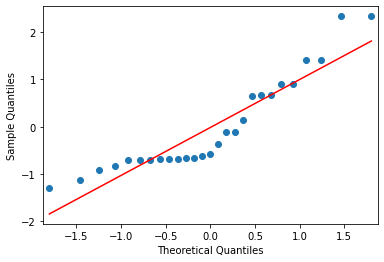

In [35]:
sm.qqplot(salarios["salary"],fit=True,line='q');

In [36]:
from scipy.stats import normaltest

In [37]:
normaltest(salarios["salary"])

NormaltestResult(statistic=4.784100989354664, pvalue=0.0914419901966388)

In [38]:
normaltest?

Signature: normaltest(a, axis=0, nan_policy='propagate')
Docstring:
Test whether a sample differs from a normal distribution.

This function tests the null hypothesis that a sample comes
from a normal distribution.  It is based on D'Agostino and
Pearson's [1]_, [2]_ test that combines skew and kurtosis to
produce an omnibus test of normality.

Parameters
----------
a : array_like
    The array containing the sample to be tested.
axis : int or None, optional
    Axis along which to compute test. Default is 0. If None,
    compute over the whole array `a`.
nan_policy : {'propagate', 'raise', 'omit'}, optional
    Defines how to handle when input contains nan.
    The following options are available (default is 'propagate'):

      * 'propagate': returns nan
      * 'raise': throws an error
      * 'omit': performs the calculations ignoring nan values

Returns
-------
statistic : float or array
    ``s^2 + k^2``, where ``s`` is the z-score returned by `skewtest` and
    ``k`` is the z-sco

In [39]:
from scipy.stats import anderson

In [42]:
anderson(salarios.salary)

AndersonResult(statistic=1.4826925318996942, critical_values=array([0.517, 0.589, 0.707, 0.824, 0.98 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [43]:
from scipy.stats import shapiro

In [44]:
shapiro(salarios.salary)

ShapiroResult(statistic=0.8655544519424438, pvalue=0.0023778295144438744)

## Krustall Wallis
Se realzia un estudio sobre drogas en el que se compara clasificaciomnes de dolor.
Se suministran cuatro grupos de dosis:
* valor1 100 mg
* valor2 250 mg
* valor3 500 mg
* valor4 1000 mg


In [45]:
drogas=pd.read_csv('./Datos/drugstudy.csv')

In [46]:
drogas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dose    38 non-null     float64
 1   rating  38 non-null     float64
dtypes: float64(2)
memory usage: 736.0 bytes


In [47]:
drogas.describe().T

,count,mean,std,min,25%,50%,75%,max
dose,38.0,2.394737,1.128009,1.0,1.0,2.0,3.0,4.0
rating,38.0,3.394737,1.586079,1.0,2.0,3.0,4.0,7.0


In [49]:
drogas.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
dose,38.0,2.394737,1.128009,1.0,1.0,2.0,3.0,4.0
rating,38.0,3.394737,1.586079,1.0,2.0,3.0,4.0,7.0


In [51]:
drogas.dose.value_counts(normalize=True)

1.0    0.289474
3.0    0.263158
2.0    0.236842
4.0    0.210526
Name: dose, dtype: float64

In [52]:
grupo1=drogas[drogas.dose==1]
grupo2=drogas[drogas.dose==2]
grupo3=drogas[drogas.dose==3]
grupo4=drogas[drogas.dose==4]

In [53]:
drogas.groupby(["dose"]).mean()

,rating
dose,
1.0,5.090909
2.0,3.333333
3.0,2.400000
4.0,2.375000


In [54]:
from scipy.stats import kruskal

In [55]:
kruskal?

Signature: kruskal(*args, nan_policy='propagate')
Docstring:
Compute the Kruskal-Wallis H-test for independent samples.

The Kruskal-Wallis H-test tests the null hypothesis that the population
median of all of the groups are equal.  It is a non-parametric version of
ANOVA.  The test works on 2 or more independent samples, which may have
different sizes.  Note that rejecting the null hypothesis does not
indicate which of the groups differs.  Post hoc comparisons between
groups are required to determine which groups are different.

Parameters
----------
sample1, sample2, ... : array_like
   Two or more arrays with the sample measurements can be given as
   arguments. Samples must be one-dimensional.
nan_policy : {'propagate', 'raise', 'omit'}, optional
    Defines how to handle when input contains nan.
    The following options are available (default is 'propagate'):

      * 'propagate': returns nan
      * 'raise': throws an error
      * 'omit': performs the calculations ignoring nan 

In [57]:
kruskal(grupo1.rating,grupo2.rating,grupo3.rating,grupo4.rating)

KruskalResult(statistic=19.40404659636354, pvalue=0.0002255349919216392)

In [61]:
estadistico,pvalor=kruskal(grupo1.rating,grupo2.rating,grupo3.rating,grupo4.rating)
if pvalor>0.05:
    print("No rechazamos H0")
else:
    print("Rechazamos H0")

Rechazamos H0


$$ \binom{4}{2} = \cfrac{4!}{(2!(4-2)!)} = \cfrac{4\times 3}{2}$$

In [75]:
Rechazados={}
Aceptados={}
s=0
h=0
for i in range(1,4):
    for j in range(i+1,5):
        grupo1=drogas[drogas.dose==i]
        grupo2=drogas[drogas.dose==j]
        stat, p = mannwhitneyu(grupo1.rating,grupo2.rating,alternative='two-sided')
        print("="*20)
        if p > 0.05:
            s+=1
            Aceptados[s]=[i,j]
            # print('No rechazamos H0: No hay diferencias significativas entre los grupos {0} y {1}.'.format(i,j))
        else:
            h+=1
	        # print('Rechazamos H0: Hay diferencias significativas entre los grupos {0} y {1}.'.format(i,j))
            Rechazados[h]=[i,j]

In [113]:
Rechazados={}
Aceptados={}
s=0
for i,j in [(x,y) for x in drogas.dose.unique() for y in drogas.dose.unique() if x<y]:
    s+=1
    stat, p = mannwhitneyu(drogas[drogas.dose==i].rating,drogas[drogas.dose==j].rating,alternative='two-sided')
    if p > 0.05:
        Aceptados[s]=[i,j]
    else:
        Rechazados[s]=[i,j]

In [112]:
for x in enumerate([(x,y) for x in drogas.dose.unique() for y in drogas.dose.unique() if x<y]):
    print(x)

(0, (1.0, 2.0))
(1, (1.0, 3.0))
(2, (1.0, 4.0))
(3, (2.0, 3.0))
(4, (2.0, 4.0))
(5, (3.0, 4.0))


In [108]:
Rechazados

{(1.0, 2.0): [1.0, 2.0], (1.0, 3.0): [1.0, 3.0], (1.0, 4.0): [1.0, 4.0]}

In [104]:
Aceptados

{5.0: [2.0, 3.0], 6.0: [2.0, 4.0], 7.0: [3.0, 4.0]}

In [106]:
Rechazados|Aceptados

{3.0: [1.0, 2.0],
 4.0: [1.0, 3.0],
 5.0: [2.0, 3.0],
 6.0: [2.0, 4.0],
 7.0: [3.0, 4.0]}